<a href="https://colab.research.google.com/github/Hariharapanda-Deepak/Hotel_booking_Analysis/blob/main/Deepak_Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [1]:
#importing Libraries and loading the data file

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
# Mounting Drive and importing Data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
path='/content/drive/MyDrive/Colab Notebooks/'

df=pd.read_csv(path + 'Hotel Bookings.csv')
df.shape

(119390, 32)

In [5]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [6]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

# **Understanding the DATA**

Droping Duplicate Values
   The duplicate values are identified and the duplicate values are dropped from the data

In [7]:
duplicate_values=df[df.duplicated()]

In [8]:
duplicate_values

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
22,Resort Hotel,0,72,2015,July,27,1,2,4,2,...,No Deposit,250.0,NaN,0,Transient,84.67,0,1,Check-Out,2015-07-07
43,Resort Hotel,0,70,2015,July,27,2,2,3,2,...,No Deposit,250.0,NaN,0,Transient,137.00,0,1,Check-Out,2015-07-07
138,Resort Hotel,1,5,2015,July,28,5,1,0,2,...,No Deposit,240.0,NaN,0,Transient,97.00,0,0,Canceled,2015-07-01
200,Resort Hotel,0,0,2015,July,28,7,0,1,1,...,No Deposit,240.0,NaN,0,Transient,109.80,0,3,Check-Out,2015-07-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119349,City Hotel,0,186,2017,August,35,31,0,3,2,...,No Deposit,9.0,NaN,0,Transient,126.00,0,2,Check-Out,2017-09-03
119352,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119353,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119354,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03


In [9]:
df=df.drop_duplicates()
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [10]:
df.shape

(87396, 32)

Finding null values and identifying the data types of each column

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87396 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87396 non-null  object 
 1   is_canceled                     87396 non-null  int64  
 2   lead_time                       87396 non-null  int64  
 3   arrival_date_year               87396 non-null  int64  
 4   arrival_date_month              87396 non-null  object 
 5   arrival_date_week_number        87396 non-null  int64  
 6   arrival_date_day_of_month       87396 non-null  int64  
 7   stays_in_weekend_nights         87396 non-null  int64  
 8   stays_in_week_nights            87396 non-null  int64  
 9   adults                          87396 non-null  int64  
 10  children                        87392 non-null  float64
 11  babies                          87396 non-null  int64  
 12  meal                           

In [12]:
print(df.isna().sum())

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             452
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             12193
company                           82137


In [13]:
# If a booking is done at the counter of the hotel without interference of agent or company the row cannot be removed so we replace those cases with '0'
df[['company','agent']] = df[['company','agent']].fillna(0)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [14]:
print(df.isna().sum())

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            4
babies                              0
meal                                0
country                           452
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
agent                               0
company                             0
days_in_waiting_list                0
customer_typ

In [15]:
df.shape

(87396, 32)

In [16]:
my_df=df

In [17]:
yearly_df=pd.DataFrame().assign(arrival_date_year=df['arrival_date_year'],adr=df['adr'])

In [18]:
yearly_df

,arrival_date_year,adr
0,2015,0.00
1,2015,0.00
2,2015,75.00
3,2015,75.00
4,2015,98.00
...,...,...
119385,2017,96.14
119386,2017,225.43
119387,2017,157.71
119388,2017,104.40


In [19]:
a=yearly_df['adr'].values

In [20]:
a

array([  0.  ,   0.  ,  75.  , ..., 157.71, 104.4 , 151.2 ])

In [21]:
y=yearly_df['arrival_date_year'].values

In [22]:
y

array([2015, 2015, 2015, ..., 2017, 2017, 2017])

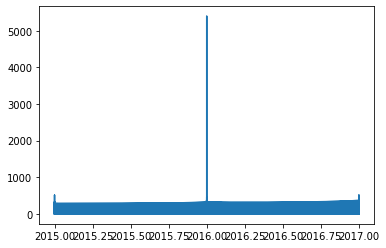

In [23]:
plt.plot(y,a)

In [24]:
yearly_count=yearly_df.groupby('arrival_date_year')['adr'].count().reset_index()

In [25]:
yearly_count

,arrival_date_year,adr
0,2015,13313
1,2016,42391
2,2017,31692


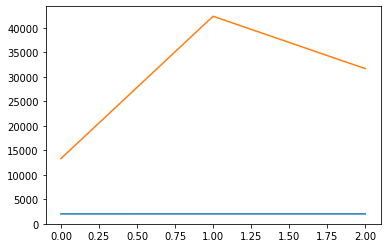

In [26]:
plt.plot(yearly_count)

In [27]:
a.sum()

9293449.99

In [28]:
b=yearly_df['arrival_date_year'].unique().tolist()

In [29]:
b

[2015, 2016, 2017]

In [30]:
c=[]

In [31]:
for x in b:
  c.append(yearly_df.loc[yearly_df['arrival_date_year'] == x, 'adr'].mean())

In [32]:
c

[92.16075189664237, 101.53890330494679, 118.71066041903319]

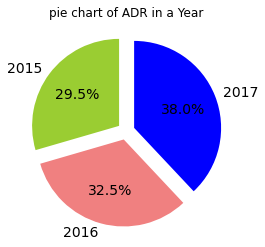

In [33]:
colors=['yellowgreen', 'lightcoral','blue']
explode = (0.1, 0.1,0.1)
plt.pie(c, explode=explode, labels=b, colors=colors, autopct='%1.1f%%',startangle=90, textprops={'fontsize': 14})
plt.title('pie chart of ADR in a Year')
plt.show()

In [34]:
df["period"] = df["arrival_date_year"].astype(str) + df["arrival_date_month"]
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,period
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0.0,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01,2015July
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0.0,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01,2015July
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0.0,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02,2015July
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,304.0,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02,2015July
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,240.0,0.0,0,Transient,98.00,0,1,Check-Out,2015-07-03,2015July
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,394.0,0.0,0,Transient,96.14,0,0,Check-Out,2017-09-06,2017August
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,9.0,0.0,0,Transient,225.43,0,2,Check-Out,2017-09-07,2017August
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,9.0,0.0,0,Transient,157.71,0,4,Check-Out,2017-09-07,2017August
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,89.0,0.0,0,Transient,104.40,0,0,Check-Out,2017-09-07,2017August


In [35]:
b=df['period'].unique().tolist()
b

['2015July',
 '2015August',
 '2015September',
 '2015October',
 '2015November',
 '2015December',
 '2016January',
 '2016February',
 '2016March',
 '2016April',
 '2016May',
 '2016June',
 '2016July',
 '2016August',
 '2016September',
 '2016October',
 '2016November',
 '2016December',
 '2017January',
 '2017February',
 '2017March',
 '2017April',
 '2017May',
 '2017June',
 '2017July',
 '2017August']

In [36]:
c=[]
for x in b:
  c.append(df.loc[df['period'] == x, 'adr'].mean())

In [37]:
c

[112.39937873357228,
 122.99439054219323,
 99.87818950334625,
 78.92546296296297,
 59.236336336336336,
 71.54029263370332,
 62.69845862628448,
 69.9317640769779,
 79.48363090576873,
 90.9726525198939,
 100.08823809523811,
 108.86535115154962,
 131.39620877694108,
 148.83396789509382,
 121.0775045442742,
 97.31195323571093,
 79.5135225225225,
 87.68759923785329,
 74.83075949367088,
 78.74954131227219,
 83.82144486692015,
 115.12843160947318,
 120.37301857923498,
 128.76182674199623,
 147.6131222418358,
 168.54932663775392]

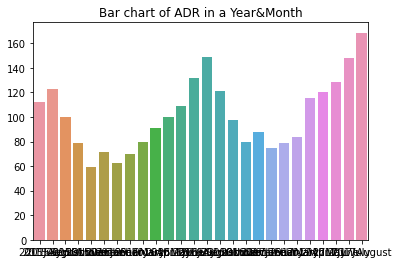

In [38]:
sns.barplot( x = b, y=c)
plt.rcParams["figure.figsize"] = [160, 5]
plt.title('Bar chart of ADR in a Year&Month')
plt.show()

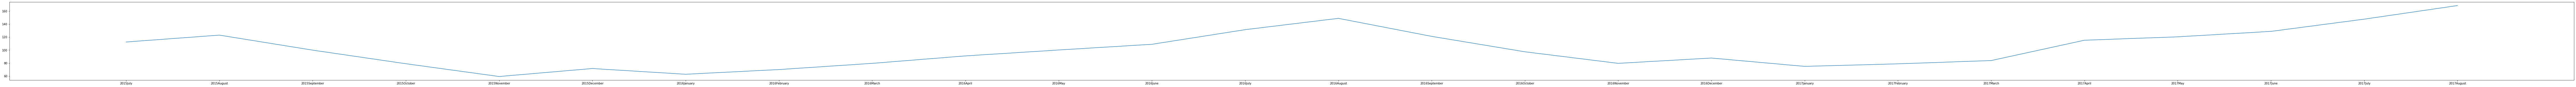

In [39]:
plt.plot(b,c)

In [40]:
adr_hotelwise=df.groupby(['period','hotel'])['adr'].mean().unstack()
adr_hotelwise

hotel,City Hotel,Resort Hotel
period,,
2015August,82.980958,155.902912
2015December,82.672814,59.736580
2015July,66.813013,126.478045
2015November,73.900213,45.771924
2015October,95.088493,56.841183
2015September,106.795730,89.967198
2016April,103.867820,68.042631
2016August,124.245032,191.921985
2016December,97.855461,70.133732


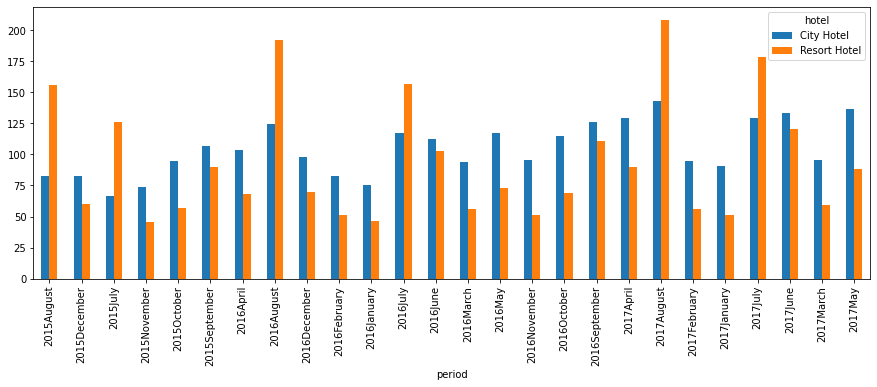

In [41]:
plt.rcParams['figure.figsize'] = (15, 5)
adr_hotelwise.plot(kind='bar')

From the above chart we can draw into a conclusion that the bookings are **increasing** from **January to August** and then **decreasing** from **August to January** every year

In [42]:
b=df['country'].unique().tolist()
b

['PRT',
 'GBR',
 'USA',
 'ESP',
 'IRL',
 'FRA',
 nan,
 'ROU',
 'NOR',
 'OMN',
 'ARG',
 'POL',
 'DEU',
 'BEL',
 'CHE',
 'CN',
 'GRC',
 'ITA',
 'NLD',
 'DNK',
 'RUS',
 'SWE',
 'AUS',
 'EST',
 'CZE',
 'BRA',
 'FIN',
 'MOZ',
 'BWA',
 'LUX',
 'SVN',
 'ALB',
 'IND',
 'CHN',
 'MEX',
 'MAR',
 'UKR',
 'SMR',
 'LVA',
 'PRI',
 'SRB',
 'CHL',
 'AUT',
 'BLR',
 'LTU',
 'TUR',
 'ZAF',
 'AGO',
 'ISR',
 'CYM',
 'ZMB',
 'CPV',
 'ZWE',
 'DZA',
 'KOR',
 'CRI',
 'HUN',
 'ARE',
 'TUN',
 'JAM',
 'HRV',
 'HKG',
 'IRN',
 'GEO',
 'AND',
 'GIB',
 'URY',
 'JEY',
 'CAF',
 'CYP',
 'COL',
 'GGY',
 'KWT',
 'NGA',
 'MDV',
 'VEN',
 'SVK',
 'FJI',
 'KAZ',
 'PAK',
 'IDN',
 'LBN',
 'PHL',
 'SEN',
 'SYC',
 'AZE',
 'BHR',
 'NZL',
 'THA',
 'DOM',
 'MKD',
 'MYS',
 'ARM',
 'JPN',
 'LKA',
 'CUB',
 'CMR',
 'BIH',
 'MUS',
 'COM',
 'SUR',
 'UGA',
 'BGR',
 'CIV',
 'JOR',
 'SYR',
 'SGP',
 'BDI',
 'SAU',
 'VNM',
 'PLW',
 'QAT',
 'EGY',
 'PER',
 'MLT',
 'MWI',
 'ECU',
 'MDG',
 'ISL',
 'UZB',
 'NPL',
 'BHS',
 'MAC',
 'TGO',
 'TWN',
 'D

In [43]:
c=[]
for x in b:
  c.append(df.loc[df['country'] == x, 'adr'].sum())

In [44]:
c

[2631082.11,
 1018981.3200000001,
 235615.49,
 886800.74,
 303177.79000000004,
 994444.91,
 0.0,
 53434.350000000006,
 63882.72,
 1786.08,
 23709.28,
 83804.15,
 570695.54,
 240104.09000000003,
 193353.28,
 123575.57,
 12956.23,
 355852.27999999997,
 208689.53,
 45627.09999999999,
 68841.98,
 97819.41,
 44936.09,
 9120.280000000002,
 15461.66,
 224890.24,
 43393.47,
 6470.4,
 118.5,
 35530.43,
 5174.18,
 937.2399999999999,
 16458.53,
 93085.68999999999,
 8475.48,
 32465.36,
 6112.27,
 88.2,
 5020.24,
 862.46,
 5547.4400000000005,
 7727.9,
 104106.06,
 2365.58,
 7271.15,
 24281.22,
 8662.32,
 40345.75,
 49645.69,
 40.5,
 203.76999999999998,
 2091.0600000000004,
 341.23,
 9568.59,
 13397.179999999998,
 1860.11,
 23259.660000000003,
 6611.33,
 3894.96,
 634.71,
 10245.45,
 3030.4500000000003,
 10118.060000000001,
 3001.3500000000004,
 1418.57,
 2536.2400000000002,
 3935.19,
 1114.01,
 398.32,
 4460.870000000001,
 8283.96,
 182.9,
 2101.26,
 3562.69,
 1489.3999999999999,
 2224.21,
 5563.92

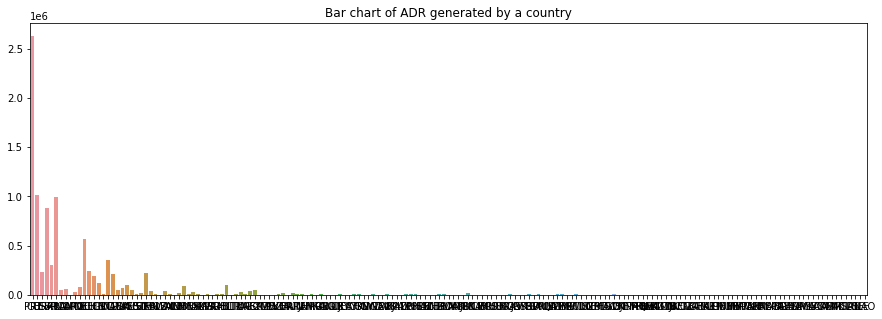

In [45]:

sns.barplot( x = b, y=c)
plt.rcParams["figure.figsize"] = [160, 10]
plt.title('Bar chart of ADR generated by a country')
plt.show()

In [46]:
df1 = pd.DataFrame({'Country': b,'adr_sum': c,})

In [47]:
df1

,Country,adr_sum
0,PRT,2631082.11
1,GBR,1018981.32
2,USA,235615.49
3,ESP,886800.74
4,IRL,303177.79
...,...,...
173,KIR,108.00
174,SDN,99.00
175,ATF,126.00
176,SLE,121.43


In [48]:
df1=df1.sort_values(by='adr_sum', ascending=False)

In [49]:
df1

,Country,adr_sum
0,PRT,2631082.11
1,GBR,1018981.32
5,FRA,994444.91
3,ESP,886800.74
12,DEU,570695.54
...,...,...
121,BHS,50.85
107,BDI,46.00
117,MDG,44.00
49,CYM,40.50


In [50]:
df1.head(10)

,Country,adr_sum
0,PRT,2631082.11
1,GBR,1018981.32
5,FRA,994444.91
3,ESP,886800.74
12,DEU,570695.54
17,ITA,355852.28
4,IRL,303177.79
13,BEL,240104.09
2,USA,235615.49
25,BRA,224890.24


In [51]:
adr_hotelwise

hotel,City Hotel,Resort Hotel
period,,
2015August,82.980958,155.902912
2015December,82.672814,59.736580
2015July,66.813013,126.478045
2015November,73.900213,45.771924
2015October,95.088493,56.841183
2015September,106.795730,89.967198
2016April,103.867820,68.042631
2016August,124.245032,191.921985
2016December,97.855461,70.133732


In [52]:
index=list(adr_hotelwise.columns)
col=list(adr_hotelwise.index)

m_df = pd.DataFrame(abs(np.random.randn(2, 26)), index=index, columns=col)
m_df.style.background_gradient(cmap='RdYlGn_r')


,2015August,2015December,2015July,2015November,2015October,2015September,2016April,2016August,2016December,2016February,2016January,2016July,2016June,2016March,2016May,2016November,2016October,2016September,2017April,2017August,2017February,2017January,2017July,2017June,2017March,2017May
City Hotel,0.138286,1.578354,0.063796,0.810117,0.282112,0.520862,0.907203,0.875425,0.029028,0.114184,0.003632,2.553254,2.825043,0.095779,0.634771,0.663702,2.279688,1.552281,0.274846,0.611997,0.007780,0.251111,1.821008,1.817222,1.394666,0.329851
Resort Hotel,0.914289,0.465338,2.154750,0.002943,0.222419,0.590595,1.587835,0.463160,1.079820,0.470188,0.447073,1.432607,0.516654,1.118799,0.428147,0.221737,0.702744,0.247186,0.690008,0.230724,0.194393,0.260160,0.593053,0.407360,0.217462,0.192386


In [78]:
hotel_time=pd.DataFrame().assign(country=df['country'],lead_time=df['lead_time'],waiting_time=df['days_in_waiting_list'])

In [81]:
time_df=hotel_time
time_df

,country,lead_time,waiting_time
0,PRT,342,0
1,PRT,737,0
2,GBR,7,0
3,GBR,13,0
4,GBR,14,0
...,...,...,...
119385,BEL,23,0
119386,FRA,102,0
119387,DEU,34,0
119388,GBR,109,0


In [83]:
time_analysis=time_df.groupby('country')

In [84]:
T1=time_analysis.describe()
T1

lead_time                                                        \
            count        mean         std    min     25%    50%     75%   
country                                                                   
ABW           2.0  126.000000  114.551299   45.0   85.50  126.0  166.50   
AGO         342.0   23.897661   38.788071    0.0    2.00   12.0   28.00   
AIA           1.0    0.000000         NaN    0.0    0.00    0.0    0.00   
ALB          11.0   93.272727  104.317871    3.0   21.00   32.0  171.50   
AND           7.0   47.000000   42.023803    1.0   20.00   37.0   70.00   
...           ...         ...         ...    ...     ...    ...     ...   
VGB           1.0  109.000000         NaN  109.0  109.00  109.0  109.00   
VNM           8.0   84.125000   74.742295    3.0   22.50   66.5  126.75   
ZAF          78.0   69.871795   85.231139    0.0    9.25   36.5  107.50   
ZMB           2.0   68.500000   38.890873   41.0   54.75   68.5   82.25   
ZWE           4.0   83.000000   92.101393   15.0   22.50   51.0  111.50   

               waiting_time                                     
           max        count mean  std  min  25%  50%  75%  max  
country                                                         
ABW      207.0          2.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
AGO      251.0        342.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
AIA        0.0          1.0  0.0  NaN  0.0  0.0  0.0  0.0  0.0  
ALB      262.0         11.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
AND      111.0          7.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
...        ...          ...  ...  ...  ...  ...  ...  ...  ...  
VGB      109.0          1.0  0.0  NaN  0.0  0.0  0.0  0.0  0.0  
VNM      210.0          8.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
ZAF      468.0         78.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
ZMB       96.0          2.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
ZWE      215.0          4.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[177 rows x 16 columns]

In [85]:
T1.columns

MultiIndex([(   'lead_time', 'count'),
            (   'lead_time',  'mean'),
            (   'lead_time',   'std'),
            (   'lead_time',   'min'),
            (   'lead_time',   '25%'),
            (   'lead_time',   '50%'),
            (   'lead_time',   '75%'),
            (   'lead_time',   'max'),
            ('waiting_time', 'count'),
            ('waiting_time',  'mean'),
            ('waiting_time',   'std'),
            ('waiting_time',   'min'),
            ('waiting_time',   '25%'),
            ('waiting_time',   '50%'),
            ('waiting_time',   '75%'),
            ('waiting_time',   'max')],
           )

In [88]:
T1=T1.loc[T1[('lead_time', 'count')]>1000]
T1

lead_time                                                         \
            count        mean         std  min   25%   50%    75%    max   
country                                                                    
BEL        2081.0   94.290245   80.007766  0.0  28.0  75.0  149.0  396.0   
BRA        1995.0   80.864662   79.065161  0.0  19.0  55.0  127.0  354.0   
CHE        1570.0   87.754777   76.339889  0.0  24.0  68.0  135.0  457.0   
CN         1093.0  106.650503   88.937360  0.0  33.0  89.0  166.0  465.0   
DEU        5387.0  105.089103   89.521446  0.0  31.0  83.0  165.0  457.0   
ESP        7252.0   52.196773   61.621162  0.0   8.0  30.0   73.0  367.0   
FRA        8837.0   74.135906   71.760677  0.0  17.0  51.0  111.0  479.0   
GBR       10433.0  117.419055  100.141790  0.0  33.0  93.0  180.0  709.0   
IRL        3016.0  114.276857   87.299131  0.0  41.0  98.0  168.0  465.0   
ITA        3066.0   83.231246   75.470956  0.0  19.0  64.0  128.0  348.0   
NLD        1911.0   79.920984   75.768942  0.0  16.0  56.0  128.5  365.0   
PRT       27453.0   65.101228   87.641595  0.0   3.0  25.0   98.0  737.0   
USA        1875.0   68.748800   74.041411  0.0  12.0  44.0  103.0  542.0   

        waiting_time                                                  
               count      mean        std  min  25%  50%  75%    max  
country                                                               
BEL           2081.0  0.119173   4.283490  0.0  0.0  0.0  0.0  185.0  
BRA           1995.0  0.204010   4.771928  0.0  0.0  0.0  0.0  167.0  
CHE           1570.0  0.087261   2.661369  0.0  0.0  0.0  0.0   98.0  
CN            1093.0  0.143641   3.601288  0.0  0.0  0.0  0.0  109.0  
DEU           5387.0  1.051977  12.672101  0.0  0.0  0.0  0.0  224.0  
ESP           7252.0  0.149890   3.556934  0.0  0.0  0.0  0.0  207.0  
FRA           8837.0  0.846667  12.670392  0.0  0.0  0.0  0.0  379.0  
GBR          10433.0  0.377264   6.535174  0.0  0.0  0.0  0.0  150.0  
IRL           3016.0  0.043103   1.573874  0.0  0.0  0.0  0.0   61.0  
ITA           3066.0  0.961840   9.256337  0.0  0.0  0.0  0.0  174.0  
NLD           1911.0  0.358974   6.701947  0.0  0.0  0.0  0.0  185.0  
PRT          27453.0  1.279678  12.940097  0.0  0.0  0.0  0.0  391.0  
USA           1875.0  0.308800   5.686501  0.0  0.0  0.0  0.0  147.0

In [94]:
plt.figure(figsize=(100, 100))
cm = sns.light_palette("green", as_cmap=True)
T1.style.background_gradient(cmap=cm)

<Figure size 7200x7200 with 0 Axes>

In [61]:
rooms_df= pd.DataFrame({'reserved': df['reserved_room_type'],'assigned': df['assigned_room_type'],'is_canceled':df['is_canceled']})

In [62]:
room_analysis=rooms_df.value_counts().unstack()
room_analysis[0] = room_analysis[0].fillna(0)
room_analysis[1] = room_analysis[1].fillna(0)
room_analysis
room_analysis['percent of canceled'] = (room_analysis[1] / (room_analysis[1]+room_analysis[0])) * 100

In [63]:
R1=room_analysis.drop([0, 1], axis=1)
R1

is_canceled        percent of canceled
reserved assigned                     
A        A                   30.876872
         B                    9.284116
         C                    7.961783
         D                    3.900156
         E                    4.057971
...                                ...
L        C                  100.000000
         F                    0.000000
         H                    0.000000
         L                  100.000000
P        P                  100.000000

[75 rows x 1 columns]

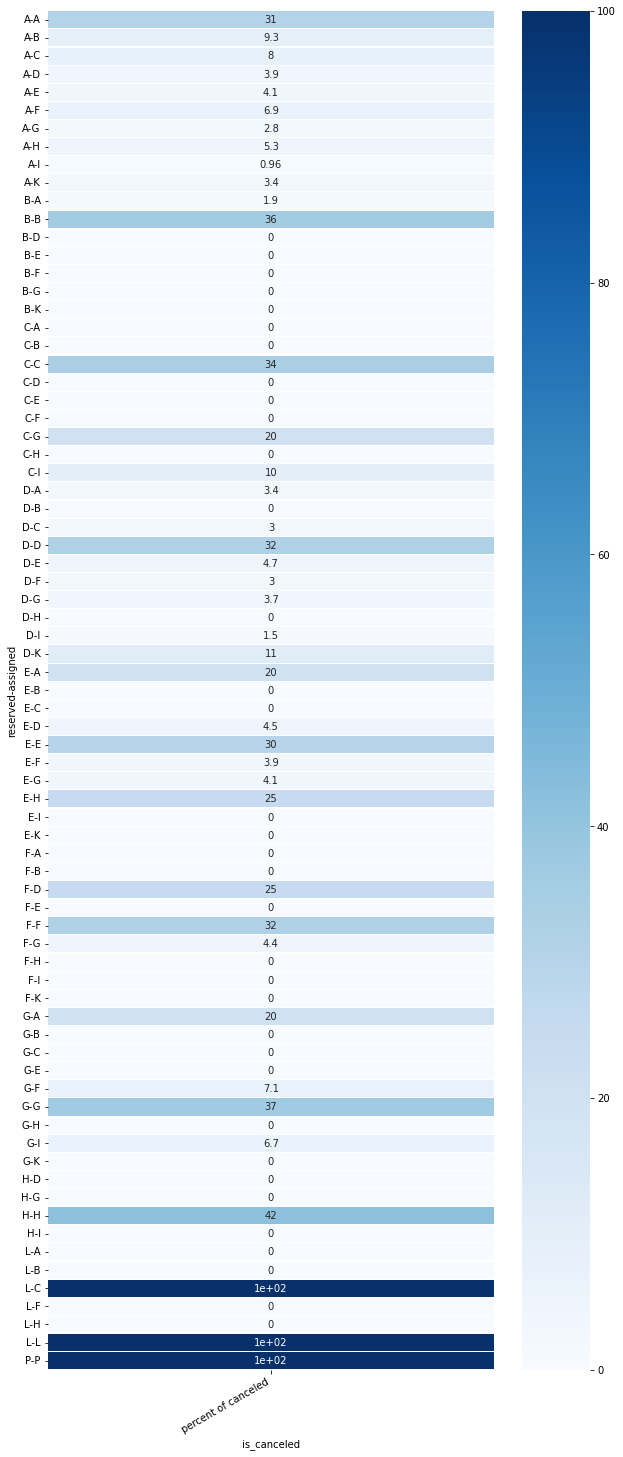

In [64]:
plt.figure(figsize=(10, 25))
sns.heatmap(R1, vmax=100, annot=True, linewidths=0.1,cmap='Blues')
plt.xticks(rotation=30, horizontalalignment='right')
plt.show()